In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

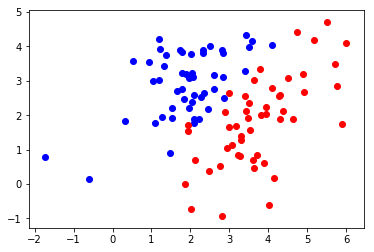

In [3]:
# generate random data
N1, N2 = 50, 50
mean1, cov1 = np.array([2,3]), np.matrix([[1., 0.5],[0.5, 1.]])
mean2, cov2 = np.array([4,2]), np.matrix([[1., 0.5],[0.5, 1.]])
cluster_1_data = np.random.multivariate_normal(mean1, cov2, N1)
cluster_2_data = np.random.multivariate_normal(mean2, cov2, N2)

X = np.r_[cluster_1_data, cluster_2_data]
y = np.r_[np.zeros((len(cluster_1_data),1)), np.ones((len(cluster_2_data),1))].flatten()

plt.scatter(cluster_1_data[:,0], cluster_1_data[:,1], facecolors='b')
plt.scatter(cluster_2_data[:,0], cluster_2_data[:,1], facecolors='r')

In [4]:
def eval_classifier(clf, X, y):
    model = clf.train(X, y)

    y_pred = model.predict(X).flatten()
    # actual in outer circle
    plt.scatter(cluster_1_data[:,0], cluster_1_data[:,1], s=40, facecolors='blue')
    plt.scatter(cluster_2_data[:,0], cluster_2_data[:,1], s=40, facecolors='red')
    # predictions in inner circles
    plt.scatter(X[y_pred==0,0], X[y_pred==0,1], s=10, facecolors='blue')
    plt.scatter(X[y_pred==1,0], X[y_pred==1,1], s=10, facecolors='red')

    # plot discriminant line
    xs = np.linspace(0,6,100)
    plt.plot(xs, model.disc_line(xs))

    print('{:.2f}% error rate'.format(100 * np.not_equal(y,y_pred).sum()/(X.shape[0])))

In [38]:
# Implementation
def logistic_sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
class GaussianMLEClassifier(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        K = X.shape[1]
        
        X0, X1 = X[y==0,:], X[y==1,:]
        N0, N1 = X0.shape[0], X1.shape[0]
        
        # compute MLE estimates of gaussian parameters
        self.p = N0 / (N0 + N1)
        self.mu0 = X0.mean(axis=0).reshape((1,K))
        self.mu1 = X1.mean(axis=0).reshape((1,K))
        
        S0, S1 = np.zeros((K,K)), np.zeros((K,K))
        for i in range(X0.shape[0]):
            x0 = X0[i,:].reshape((1,K))
            S0 += np.dot(np.transpose(x0 - self.mu0), x0 - self.mu0)
        for i in range(X1.shape[0]):
            x1 = X1[i,:].reshape((1,K))
            S1 += np.dot(np.transpose(x1 - self.mu1), x1 - self.mu1)
        self.S_inv = np.linalg.inv((S0 + S1) / (N0 + N1))
        
        # compute weights
        self.w = np.dot(self.S_inv, np.transpose(self.mu0 - self.mu1))
        self.w0 = -0.5 * (np.dot(np.dot(self.mu0, self.S_inv), np.transpose(self.mu0)) - \
                          np.dot(np.dot(self.mu1, self.S_inv), np.transpose(self.mu1))) + np.log(self.p / (1 - self.p))
        return self
    
    def predict(self, X):
        return logistic_sigmoid(np.dot(X, self.w) + self.w0) < 0.5
    
    def disc_line(self, xs):
        return ((-self.w0 - self.w[0]*xs)/self.w[1]).flatten()

3.00% error rate


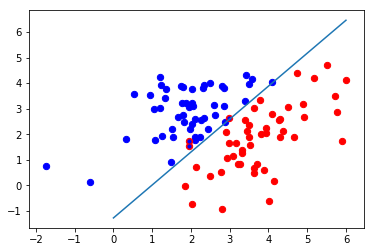

In [39]:
eval_classifier(GaussianMLEClassifier(), X, y)

In [ ]:
# TODO: Naive bayes